# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading and Reading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


From above dataset, we can observe there are '?' data in few columns so need to correct those columns invalid data in coming steps

Upon preliminary analysis of Dataset, we can assume that the datatypes are mixed data set; i.e. continous type and categorical type is available

In [3]:
df.shape

(1000, 40)

There are 614 Rows and 13 Columns including the Target in this Dataset

# Checking for any Null Values in the dataset

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are 1000 Null Values/ Missing Values in "_c39" column and total rows is also 1000 so 100% null values is in this column so dropping this column

In [5]:
df=df.drop('_c39',axis=1)

# Analyzing the Dataset Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.dtypes[df.dtypes == 'object']

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [8]:
df.dtypes[df.dtypes != 'object']

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

Most of the Columns Datatype are Object, Below are the observation we can come to conclusion from above information.

Categorical Data Columns (Object Type):

Out of 39 Columns, 21 Columns has Categorical Data

1. policy_bind_date

2.policy_state

3.policy_csl

4.insured_sex

5.insured_education_level

6.insured_occupation

7.insured_hobbies

8.insured_relationship

9.incident_date

10.incident_type

11.collision_type

12.incident_severity

13.authorities_contacted

14.incident_state

15.incident_city

16.incident_location

17.property_damage

18.police_report_available

19.auto_make

20.auto_model

21.fraud_reported

Continous Data Columns (Int and Float Type):

Out of 39 Columns, 18 Columns has Continous Data

1.months_as_customer

2.age

3.policy_number

4.policy_deductable

5.policy_annual_premium

6.umbrella_limit

7.insured_zip

8.capital-gains

9.capital-loss

10.incident_hour_of_the_day

11.number_of_vehicles_involved

12.bodily_injuries

13.witnesses

14.total_claim_amount

15.injury_claim

16.property_claim

17.vehicle_claim

18.auto_year

Target Variable is fraud_reported

Since the target variable 'fraud_reported' data type is categorical, Need to approach this data set as Classification Problem

# Analyzing the '?' Data in the dataset

In [9]:
(df=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

From above list, we can conclude there are '?' data in 3 columns

1.collision_type - 178

2.property_damage - 360

3.police_report_available - 343

All these 3 columns are categorical data so need to fill these '?' data which will be corrected in the coming steps

# Analyzing the Basic Statistics of the Dataset

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


We can observe following things from above statistics,

Outliers and Skewness presence is possible when there is a considerable difference between 75% and max is high.

Per review, below columns might possibly have outliers and skewness

1.months_as_customer

2.policy_annual_premium

3.umbrella_limit

4.capital-gains

5.total_claim_amount

6.injury_claim

7.property_claim

# Checking for any Unique Set of Values/ Elements in all Columns

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Below are the observations we can make out from above unique value column data list,

1.policy_number, incident_location has 1000 unique values so it would be efficient to drop these columns for better model performance.

policy_state, policy_csl, policy_deductable, umbrella_limit, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, auto_make, and auto_year has reasonable unique datas in the entire set; So, need to analyse these columns more with respect to relationship with fraud_reported.

2.policy_annual_premium, policy_bind_date, insured_zip have 991, 951 and 995 unique values which is greater than 95% so we can drop these columns for better accuaracy

In [12]:
df=df.drop(columns = ['policy_number', 'incident_location', 'policy_annual_premium', 'policy_bind_date', 'insured_zip'], axis = 1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,0,FEMALE,Masters,craft-repair,paintball,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,0,FEMALE,PhD,prof-specialty,sleeping,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Dropping the columns which are not much effective for the model prediction as listed in above observation notes

# Analyzing Distribution of both Target and Feature Columns

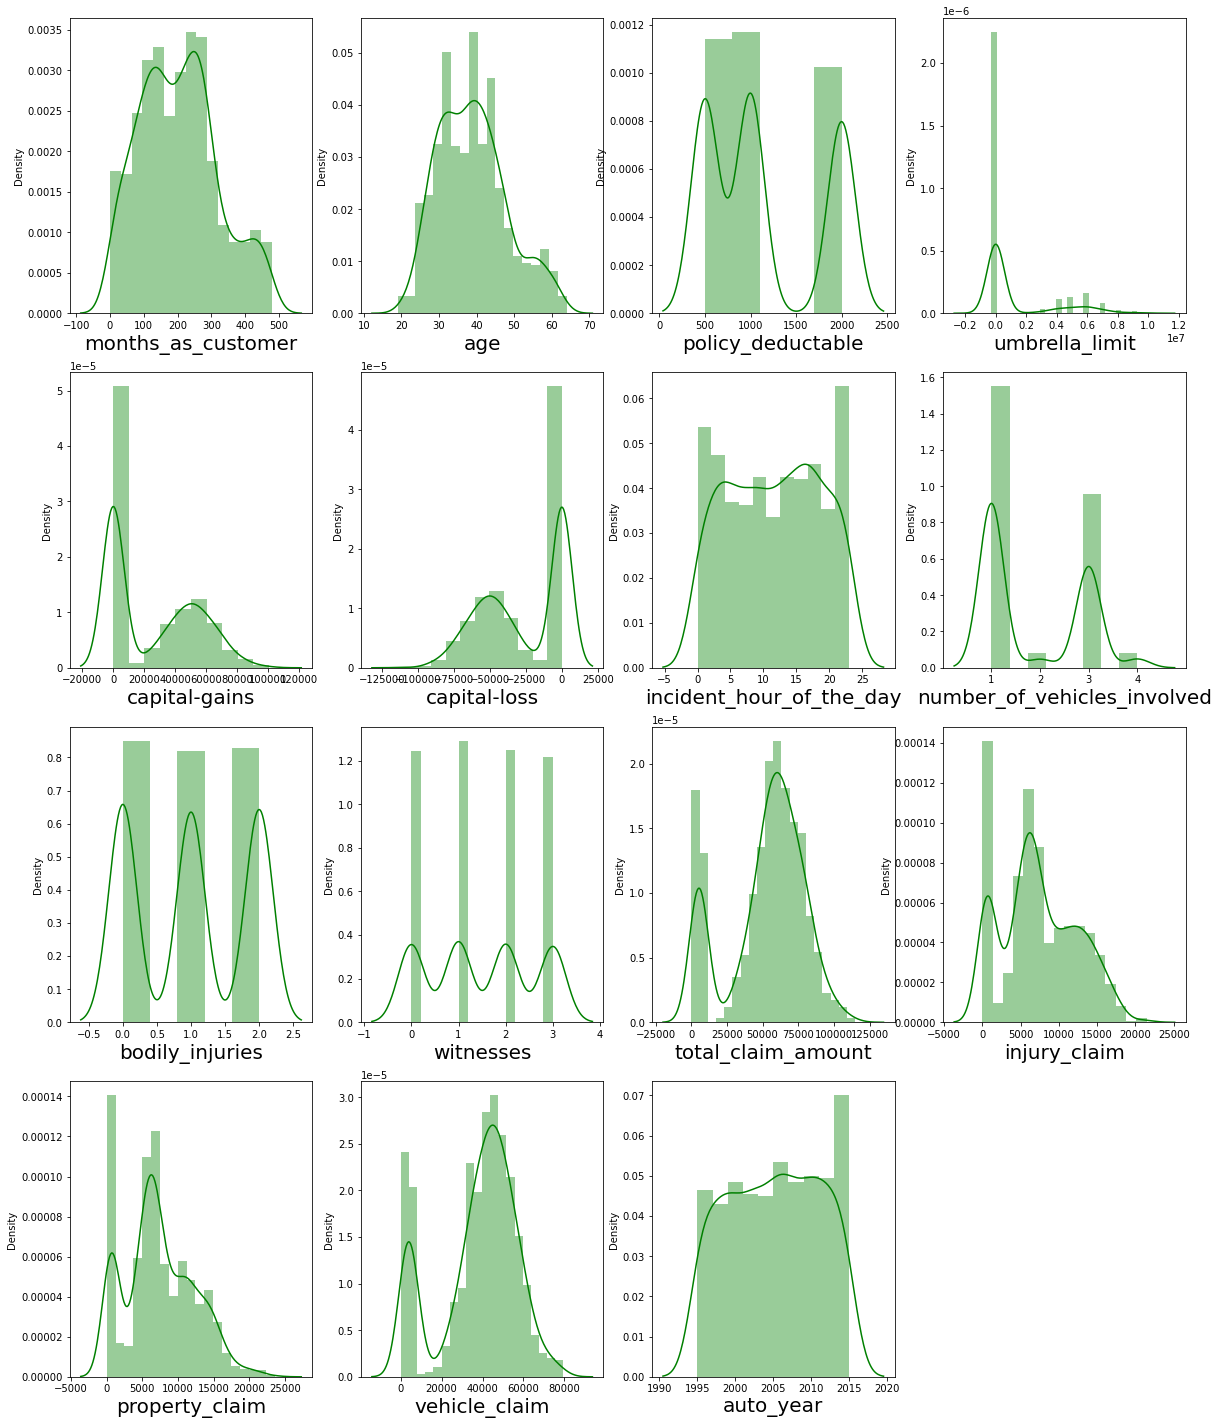

In [13]:
plt.figure(figsize = (20,25), facecolor='white')
plot_number = 1
for i in df[['months_as_customer', 'age' , 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
                            'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                            'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]:
    if plot_number <=35:
        plt.subplot(4,4,plot_number)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

Upon analyzing above graphs, most of the columns have normal distribution

In [14]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

Upon review, found umbrella_limit, total_claim_amount, vehicle_claim Columns data are skewed, i.e out of -0.50 to +0.50 Range

In [15]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

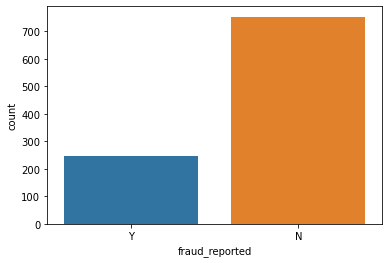

In [16]:
sns.countplot(df['fraud_reported'])

Target Variable 'fraud_reported' has 2 unique values

N : which is equivalent to No Fraud Reported

Y : which is equivalent to Fraud Reported

Most of the Insurance claims are not fraud.

We can also observe that there is a class imbalance which needs to be corrected at later stages

In [17]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

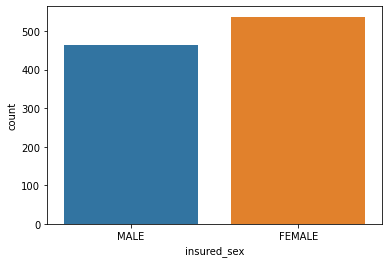

In [18]:
sns.countplot(df['insured_sex'])

Most of insured people are Female

Majority of the people are with no body injuries which is followed by 2 body injuries

In [19]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

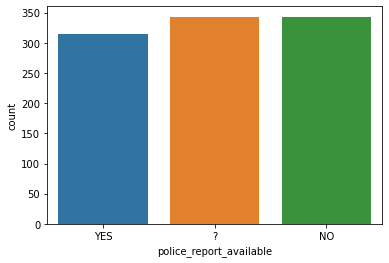

In [20]:
sns.countplot(df['police_report_available'])

Majority of the people have no police report and there is '?' data which will be corrected with NO since it is majority

In [21]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

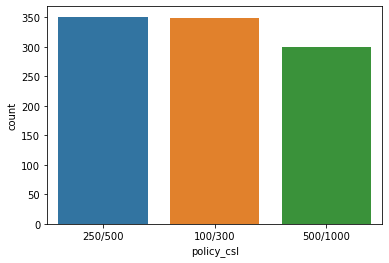

In [22]:
sns.countplot(df['policy_csl'])

Majority of the policies Combined single limit (CSL) is 250/500 closely followed by 100/300

In [23]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

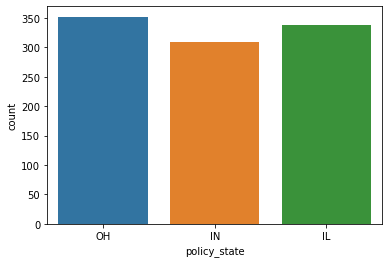

In [24]:
sns.countplot(df['policy_state'])

Majority of the insurance policies are from OH state followed by IL state.

In [25]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

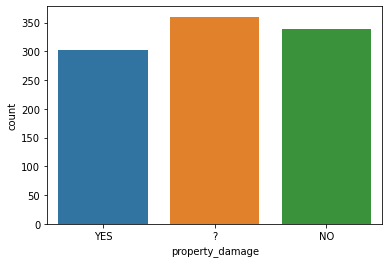

In [26]:
sns.countplot(df['property_damage'])

Most of the claims are not property damage and there is '?' data which will be corrected with NO since it is majority

In [27]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

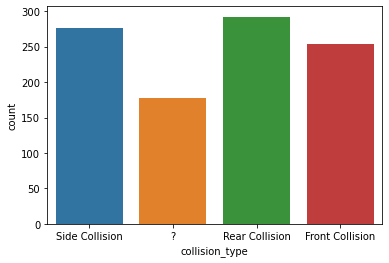

In [28]:
sns.countplot(df['collision_type'])

Most of the claims are due to Rear Collision followed by Side Collision and there is '?' data which will be corrected with Rear Collision since it is majority. This column data is related to accident.

In [29]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

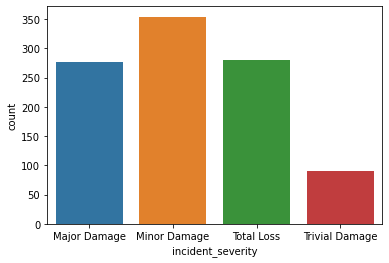

In [30]:
sns.countplot(df['incident_severity'])

There are 4 categories of Incident severities

Majority of the incident has Minor Damage followed by Total Loss

In [31]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

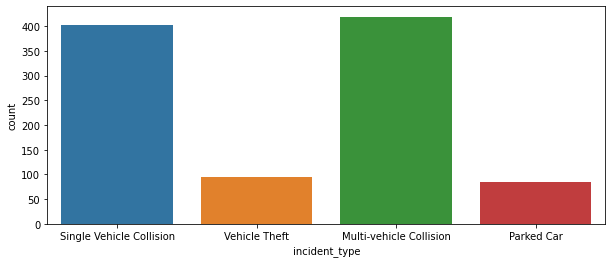

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(df['incident_type'])

There are 4 incident types

Majority of the incident is Multi-vehicle Collision followed by Single Vehicle Collision and least is Parked Car Accident Incident

In [33]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

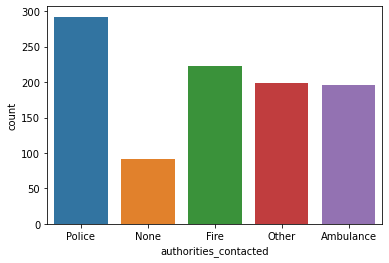

In [34]:
sns.countplot(df['authorities_contacted'])

In most of the cases, Police is contacted which is followed by Fire Authority

In [35]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

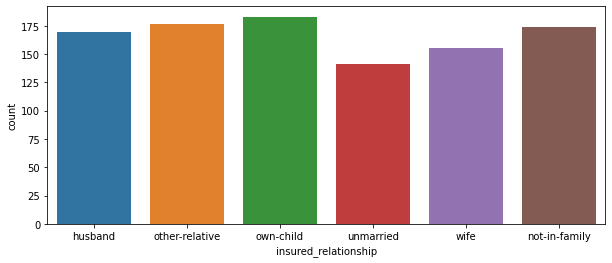

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(df['insured_relationship'])

There are 6 different Insured relationships

Majority of the insured have relationship own-child followed by other-relative. There is not much difference in the relationships

In [38]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

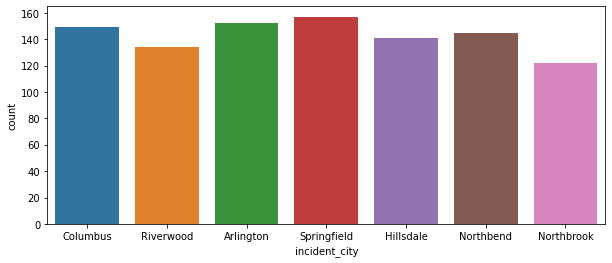

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(df['incident_city'])

There are total 7 cities where the accident occured

Most of claims are from Springfield city followed by Arlington. Northbrook is the least claims city.

In [40]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

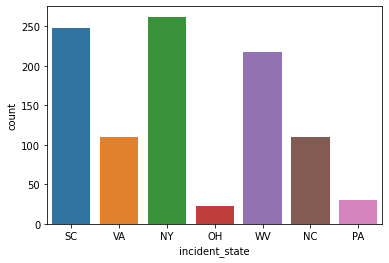

In [41]:
sns.countplot(df['incident_state'])

There are total 7 States where incidents occured

NY is the highest incident occured state followed by SC State and least is OH state.

In [42]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

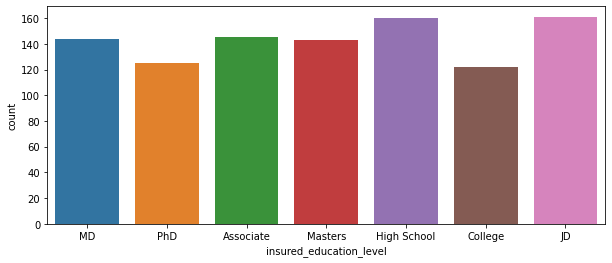

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(df['insured_education_level'])

There are 7 categories of education levels of insured

Majority of the insured have educational level of JD and High School

In [44]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make', ylabel='count'>

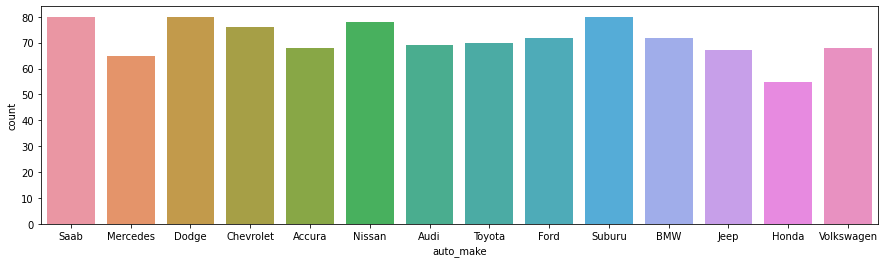

In [45]:
plt.figure(figsize=(15,4))
sns.countplot(df['auto_make'])

Out of 14 Automobile make types, Saab Suburu Dodge are majority followed Nissan. Least Accident occuring Automobile make is from Honda

In [46]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

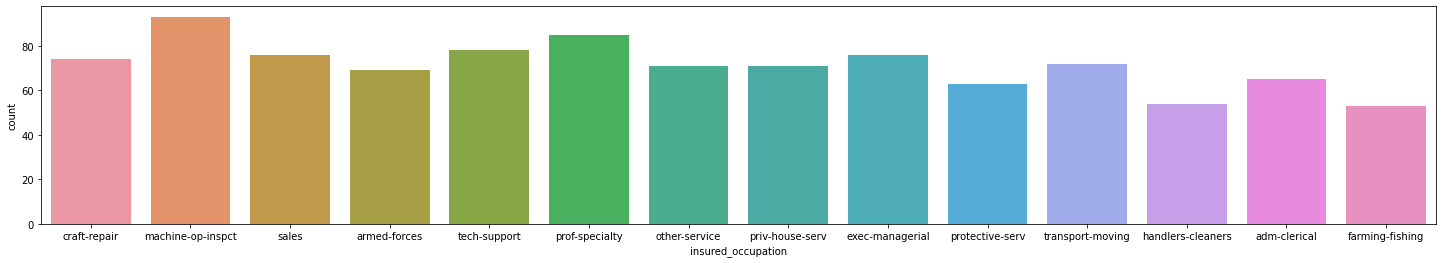

In [47]:
plt.figure(figsize=(25,4))
sns.countplot(df['insured_occupation'])

machine-op-inspct are majority insured occupation followed by prof-specialty. farming-fishing occupated insured are least

In [48]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

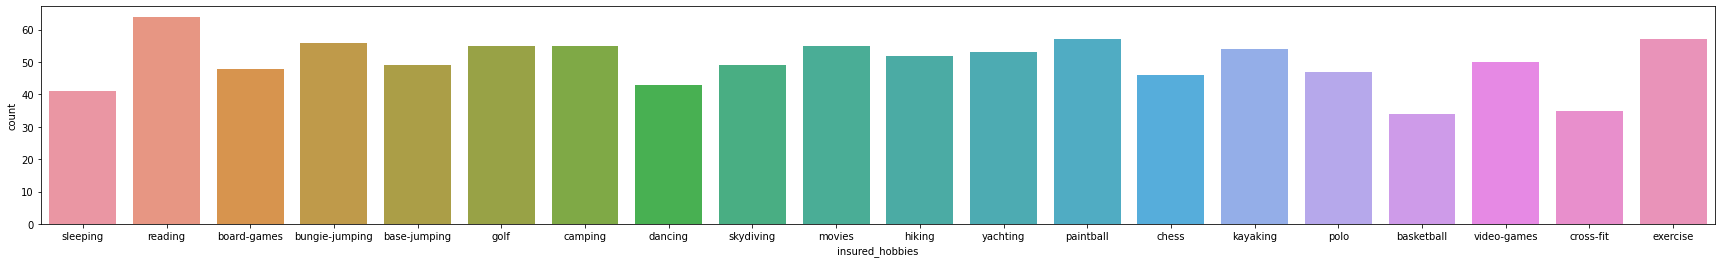

In [49]:
plt.figure(figsize=(30,4))
sns.countplot(df['insured_hobbies'])

Majority of insured have reading as hobby followed by paintball, excercise. Very less people has basketball has hobby

In [50]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

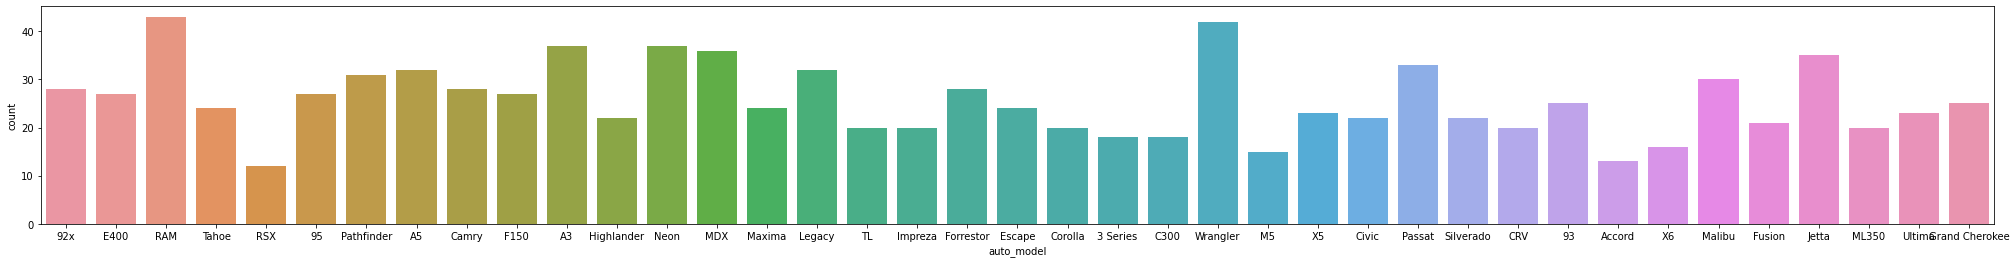

In [51]:
plt.figure(figsize=(35,4))
sns.countplot(df['auto_model'])

Most of RAM, Wrangler Automobile models have high insurance claims. RSX Automobile has leastt insurance claims

# Correcting the "?" Data in the dataset

In [52]:
(df=='?').sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

In [53]:
df.replace({'?': np.nan}, inplace=True)

Replacing these ? data to Null values for conversions

In [54]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

In [55]:
common_value_collision_type = 'Rear Collision'
df['collision_type'] = df['collision_type'].fillna(common_value_collision_type)
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

Replacing the Null Values with Majority Value - Rear Collision for collision_type column

In [56]:
common_value_property_damage = 'NO'
df['property_damage'] = df['property_damage'].fillna(common_value_property_damage)
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

Replacing the Null Values with Majority Value - NO for property_damage column

In [57]:
common_value_police_report_available = 'NO'
df['police_report_available'] = df['police_report_available'].fillna(common_value_police_report_available)
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Replacing the Null Values with Majority Value - NO for police_report_available column

In [58]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

Invalid Data (Null Values) are corrected

# Analyzing the relationship between independent variable and dependent Variable

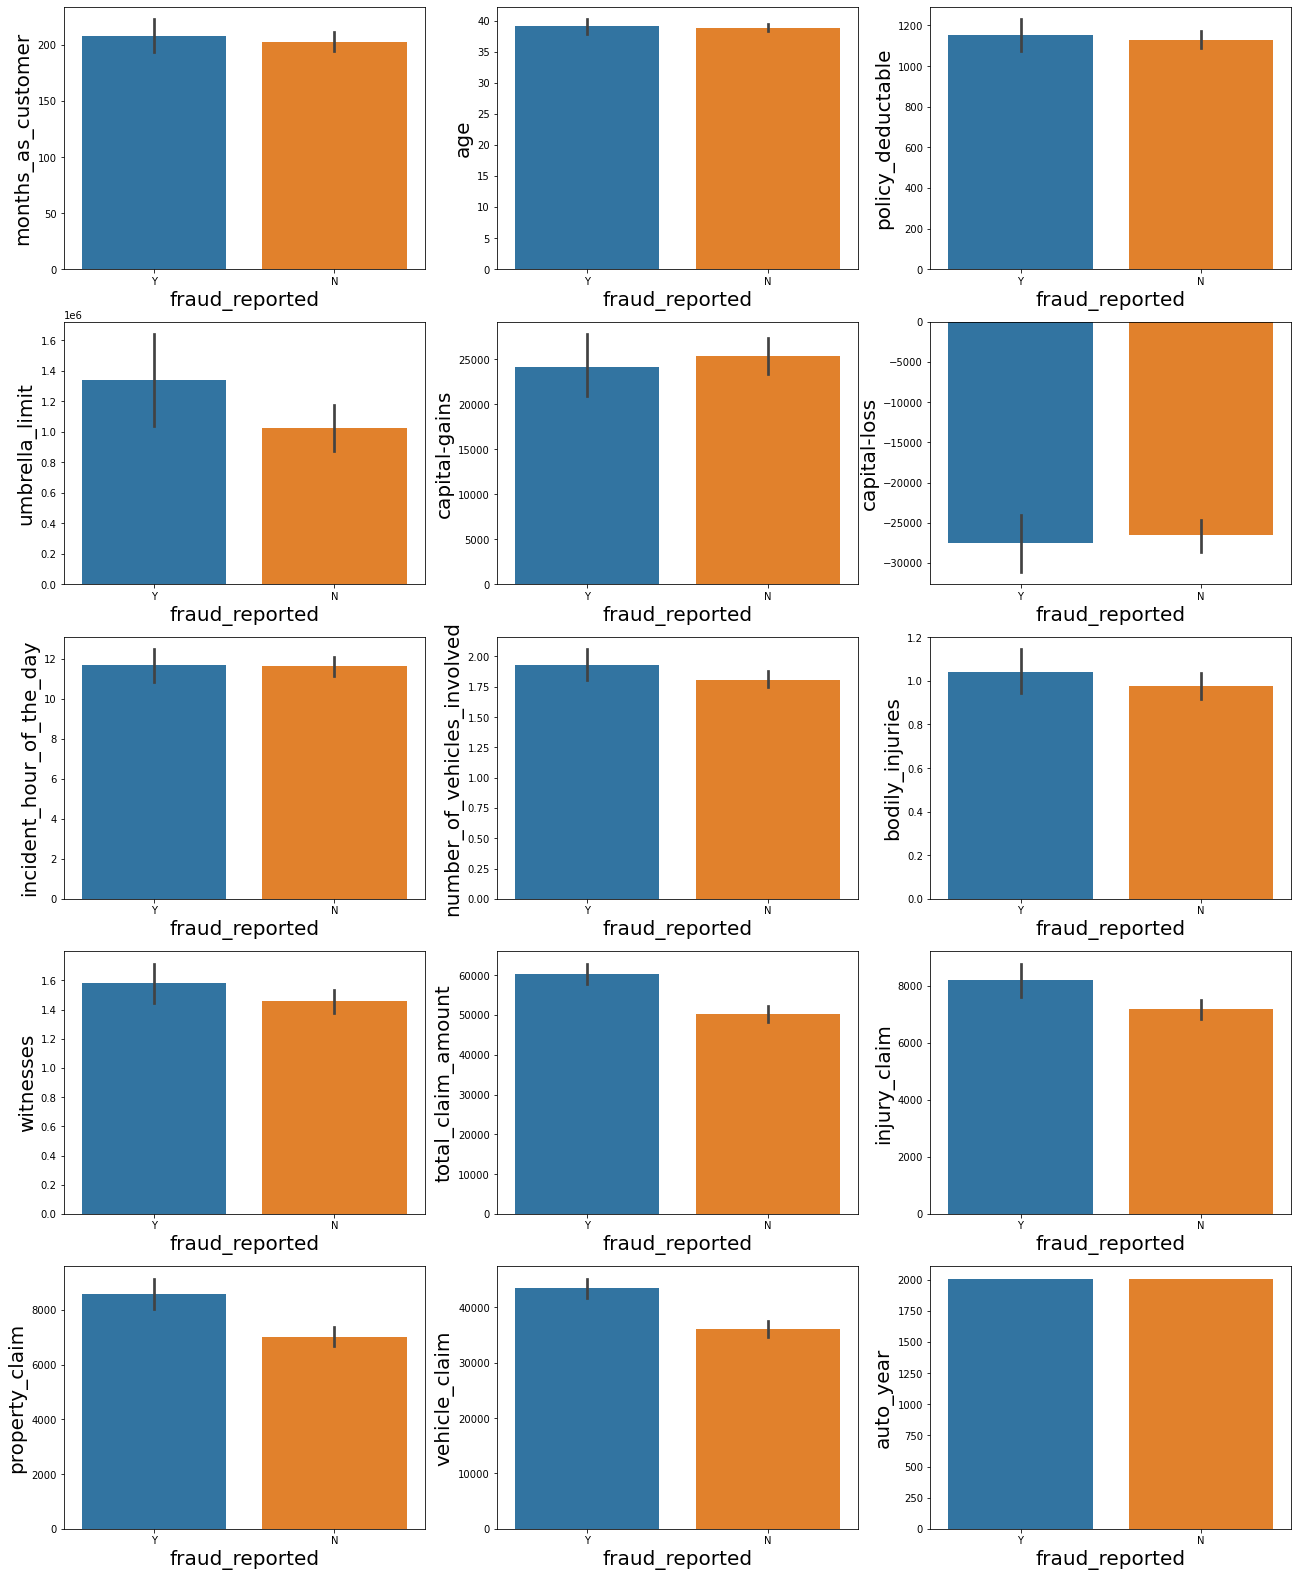

In [59]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]
y_plot = df['fraud_reported']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Most of the Continous data columns doesnt affect the target variable much. Only below listed column have an impact

1.Higher umbrella_limit has more fraud claims

2.Higher total_claim_amount has more fraud claims

3.Higher injury_claim amount has more fraud claims

4.Higher property_claim amount has more fraud claims

5.Higher vehicle_claim amount has more fraud claims

Rest of the columns relationship with target variable is almost same and not much contributive in prediction

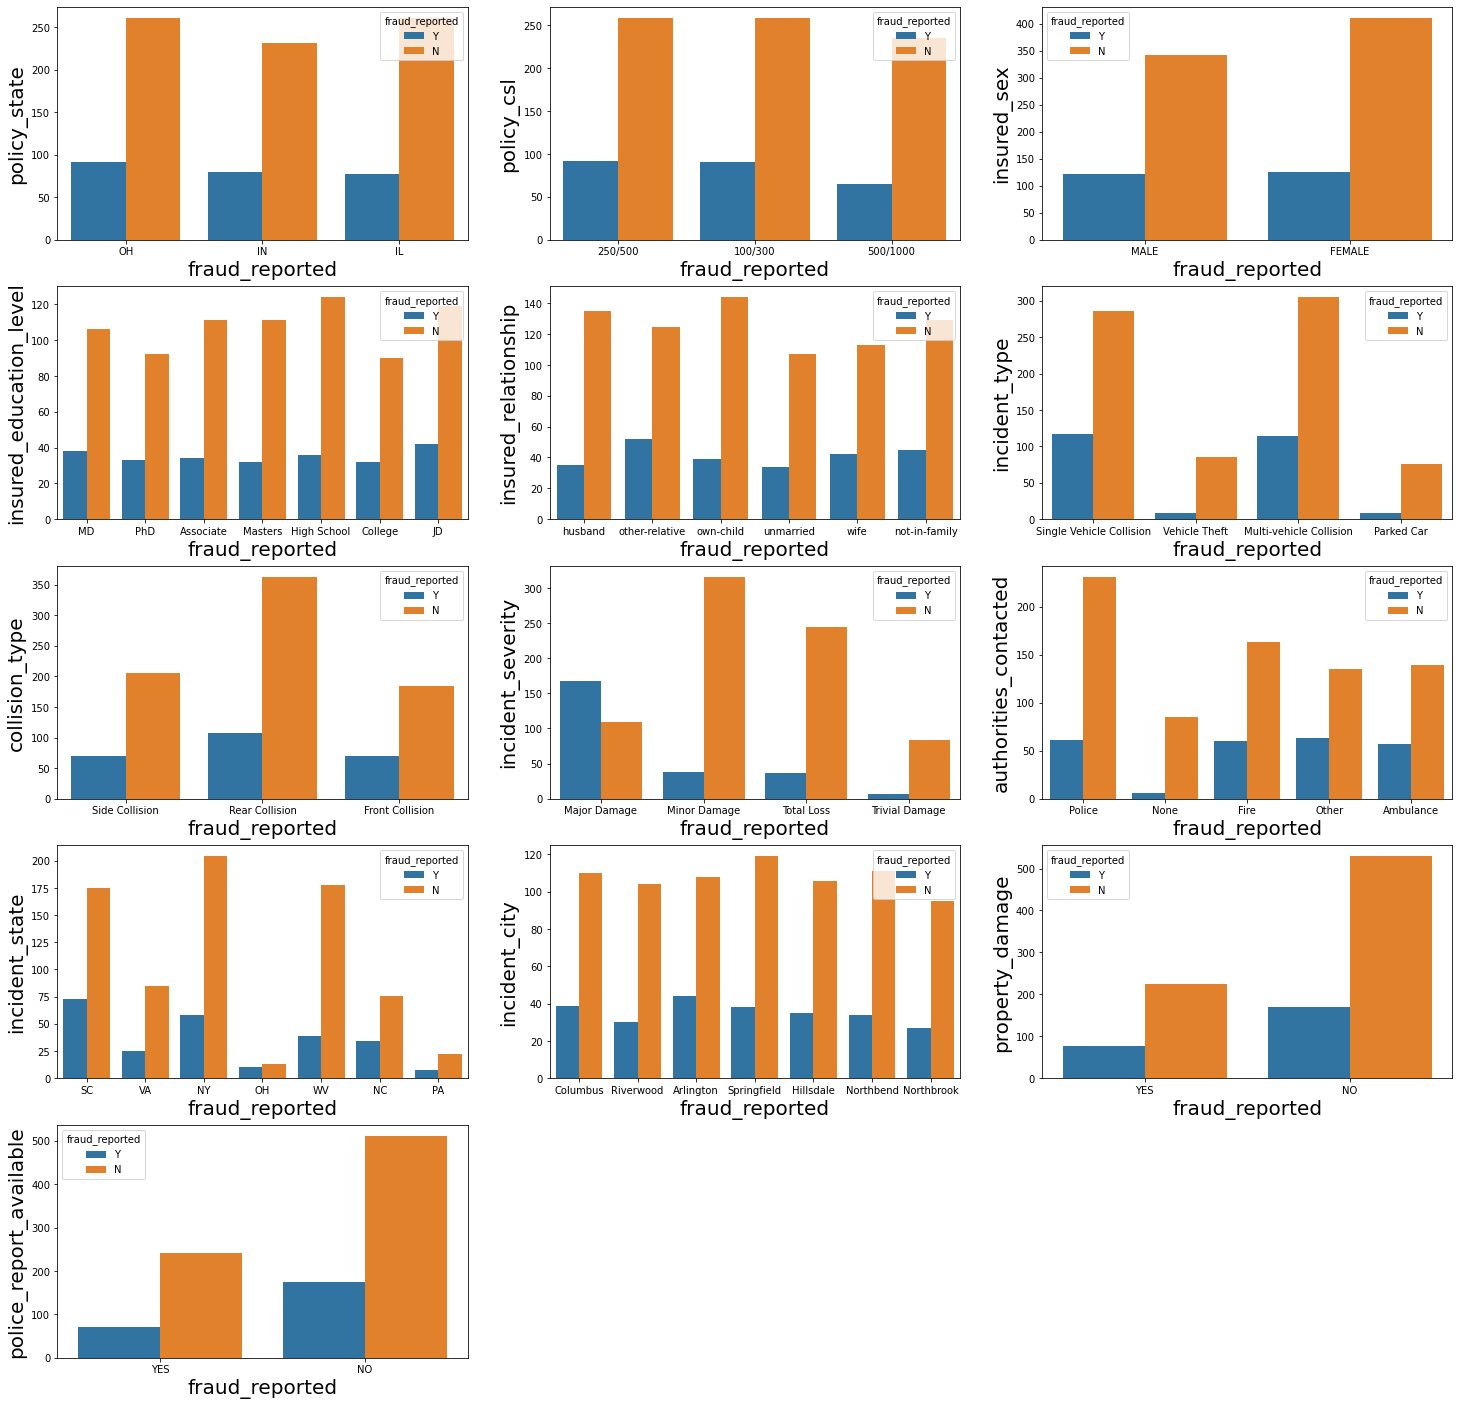

In [60]:
plt.figure(figsize=(25,30),facecolor='white')
plot_number=1
x_plot = df[['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type',
             'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
             'property_damage', 'police_report_available']]
y_plot = df['fraud_reported']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        plt.subplot(6,3,plot_number)
        sns.countplot(x_plot[i], hue=y_plot)
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

From the above graph, we can observe following details,

 - policy_state - OH and IL state claims has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

 - policy_csl - 250/500 and 100/300 CSL has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

 - insured_sex - Female Insured Claims has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

 - insured_education_level - claims of Insured with educational level High school has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

 - insured_relationship - Own-child insured relationship has higher count of genuine claims. other-relative relationship followed by not-in-family has higher count of Fraud claims.

 - incident_type - Multi-vehicle Collision has higher count of genuine claims followed by Single Vehicle Collision. Same incident type also has higher count of Fraud claims.

 - collision_type - Rear Collision has higher count of genuine claims. Same collision type also has higher count of Fraud claims.

 - incident_severity - Minor Damage Severity type has higher count of genuine claims followed by Total Loss severity type. Major Damage severity type has higher count of Fraud claims.

 - authorities_contacted - Claims where police authority are contacted has higher count of genuine claims.

 - incident_state - NY state incident claims has higher count of genuine claims followed by SC and WV state incident claims. SC state incident claims has higher count of Fraud claims.

 - incident_city - Springfield city incident claims has higher count of genuine claims. Arlington city incident claims has higher count of Fraud claims.

 - property_damage - No Property damage claims has higher count of genuine claims.

 - police_report_available - Most of the columns has No police report available so genuine and fraud claims count is higher in case when there is no police report available.


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

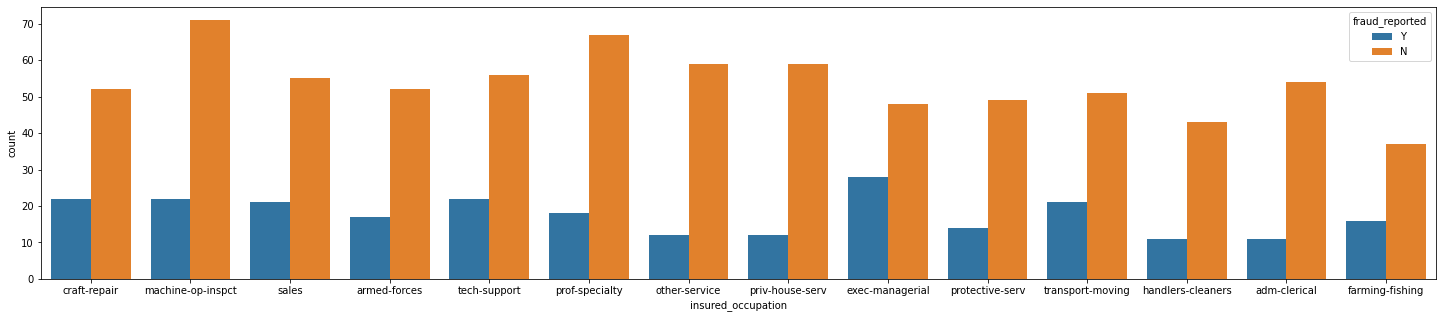

In [61]:
plt.figure(figsize=(25,5),facecolor='white')
sns.countplot(df['insured_occupation'], hue=df['fraud_reported'])

Claims with insured occupation as machine-op-inspct has higher genuine claims followed by prof-specialty

Claims with insured occupation as exec-mangerial has higher fraud claims

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

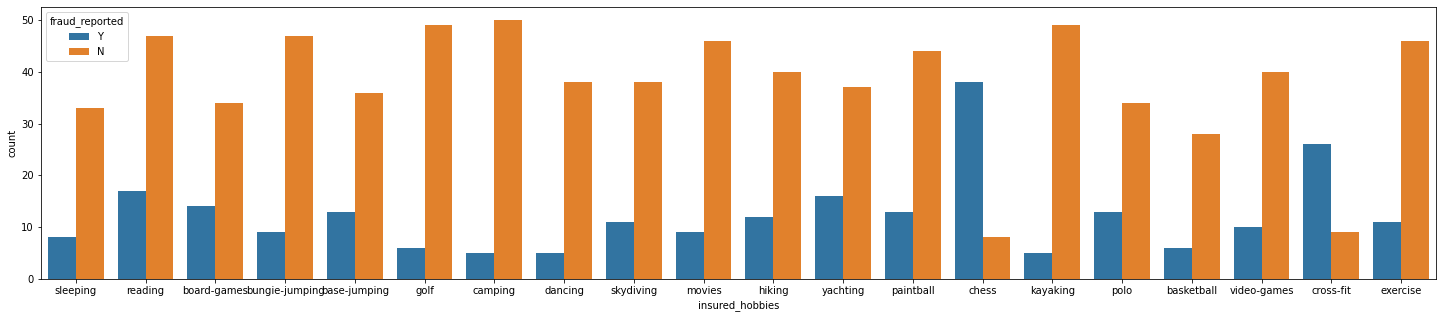

In [62]:
plt.figure(figsize=(25,5),facecolor='white')
sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'])

Claims with insured hobbies camping has higher genuine claims count followed by kayaking

Claims with insured hobbies chess has higher fraud claims count followed by cross-fit

<AxesSubplot:xlabel='auto_make', ylabel='count'>

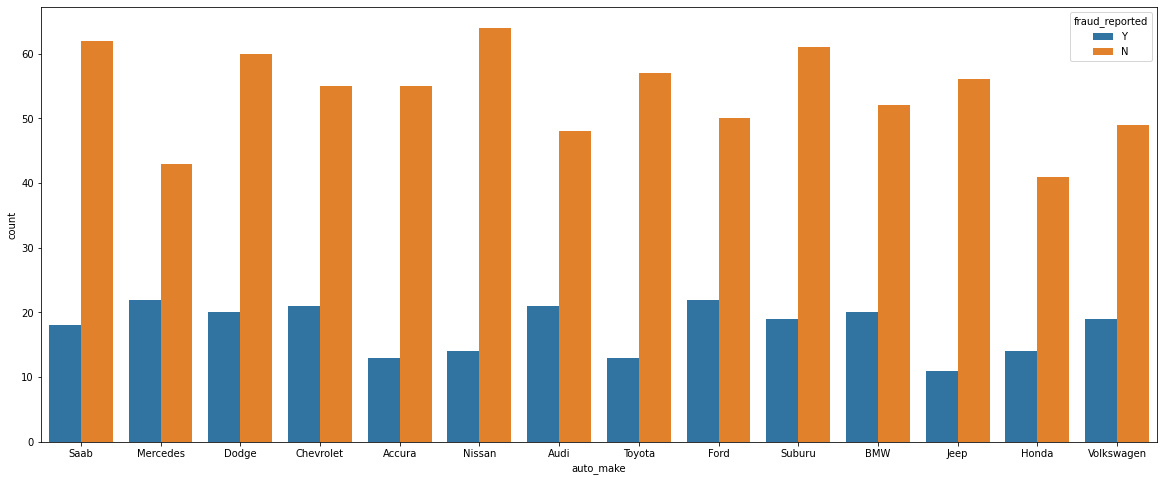

In [63]:
plt.figure(figsize=(20,8),facecolor='white')
sns.countplot(df['auto_make'], hue=df['fraud_reported'])

Claims with Automobile Make Nissan has higher genuine claims count followed by Saab, Suburu Auto Make.

Claims with Automobile Make Ford, Mercedes has higher fraud claims count.

In [64]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

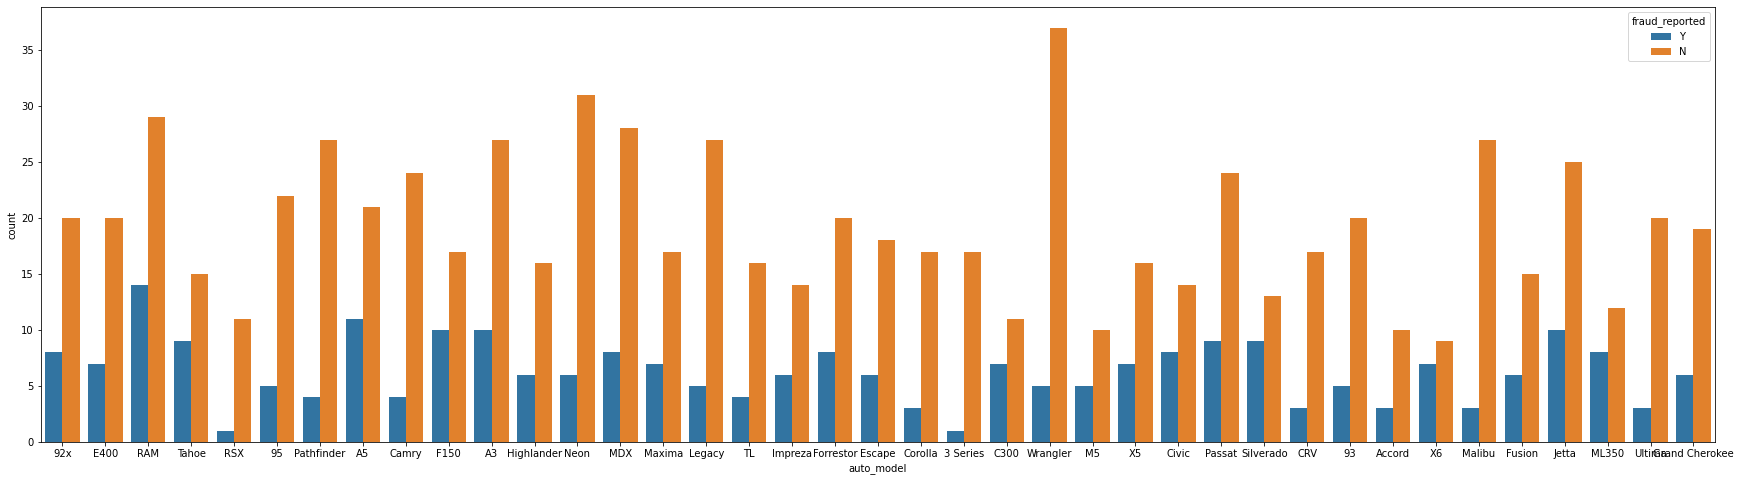

In [65]:
plt.figure(figsize=(30,8),facecolor='white')
sns.countplot(df['auto_model'], hue=df['fraud_reported'])

Wrangler auto model involved claims has higher genuine claims count followed by nissan and RAM auto model.

RAM auto model involved claims has higher fraud claims count followed A5 auto model

<AxesSubplot:xlabel='auto_model'>

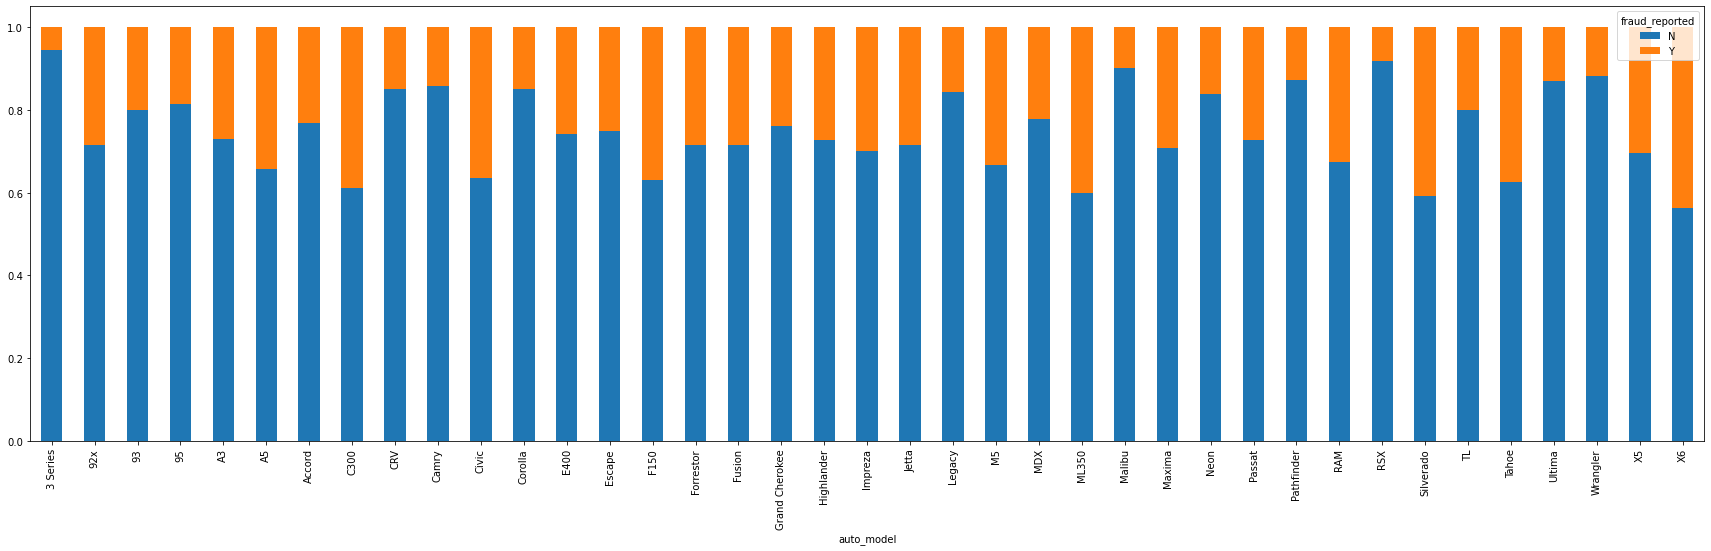

In [66]:
auto_model = pd.crosstab(df['auto_model'],df['fraud_reported'])
auto_model.div(auto_model.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(30,8))

from above crosstab comparision we can observe highest percentage of genuine and fraud claims in each auto model.

3 Series followed RSX has higher percentage of genuine claims.

ML350 followed by Silverado has higher percentage of fraud claims.

# Encoding the Categorical Data in Dataset using LabelEncoder

In [67]:
le = LabelEncoder()

df['policy_state'] = le.fit_transform(df['policy_state'])
df['policy_csl'] = le.fit_transform(df['policy_csl'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_date'] = le.fit_transform(df['incident_date'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [68]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,0,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,0,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,3000000,0,5,1,3,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,5000000,1,0,5,0,...,1,1,46980,5220,5220,36540,1,5,1998,0


We can observe that all the columns are now having numerical Data Type

In [69]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1.101000e+06,0.463000,2.966000,6.653000,9.731000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,2.297407e+06,0.498879,1.948497,4.019048,5.674049,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,0.000000e+00,0.000000,1.000000,3.000000,5.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   months_as_customer           1000 non-null   int64
 1   age                          1000 non-null   int64
 2   policy_state                 1000 non-null   int32
 3   policy_csl                   1000 non-null   int32
 4   policy_deductable            1000 non-null   int64
 5   umbrella_limit               1000 non-null   int64
 6   insured_sex                  1000 non-null   int32
 7   insured_education_level      1000 non-null   int32
 8   insured_occupation           1000 non-null   int32
 9   insured_hobbies              1000 non-null   int32
 10  insured_relationship         1000 non-null   int32
 11  capital-gains                1000 non-null   int64
 12  capital-loss                 1000 non-null   int64
 13  incident_date                1000 non-null   int3

Analyzing the changes in dataset after encoding. All values are numericals now.

# Checking Correlation between each columns data

In [71]:
corr_mat=df.corr()
corr_mat

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.015498,0.060925,-0.000833,0.009814,-0.093661,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.018126,0.073337,0.000969,0.017220,-0.081315,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.021636,-0.010757,0.009153,0.015788,-0.005960,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,0.010870,-0.009733,0.015217,-0.046733,0.004061,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,1.000000,0.010688,-0.019357,0.023422,-0.037000,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.010688,1.000000,0.009002,-0.006160,-0.020317,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019357,0.009002,1.000000,-0.020298,0.021807,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.023422,-0.006160,-0.020298,1.000000,-0.011077,...,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,-0.038689,-0.005960,0.004061,-0.037000,-0.020317,0.021807,-0.011077,1.000000,...,-0.033971,-0.027937,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.014495,-0.046838


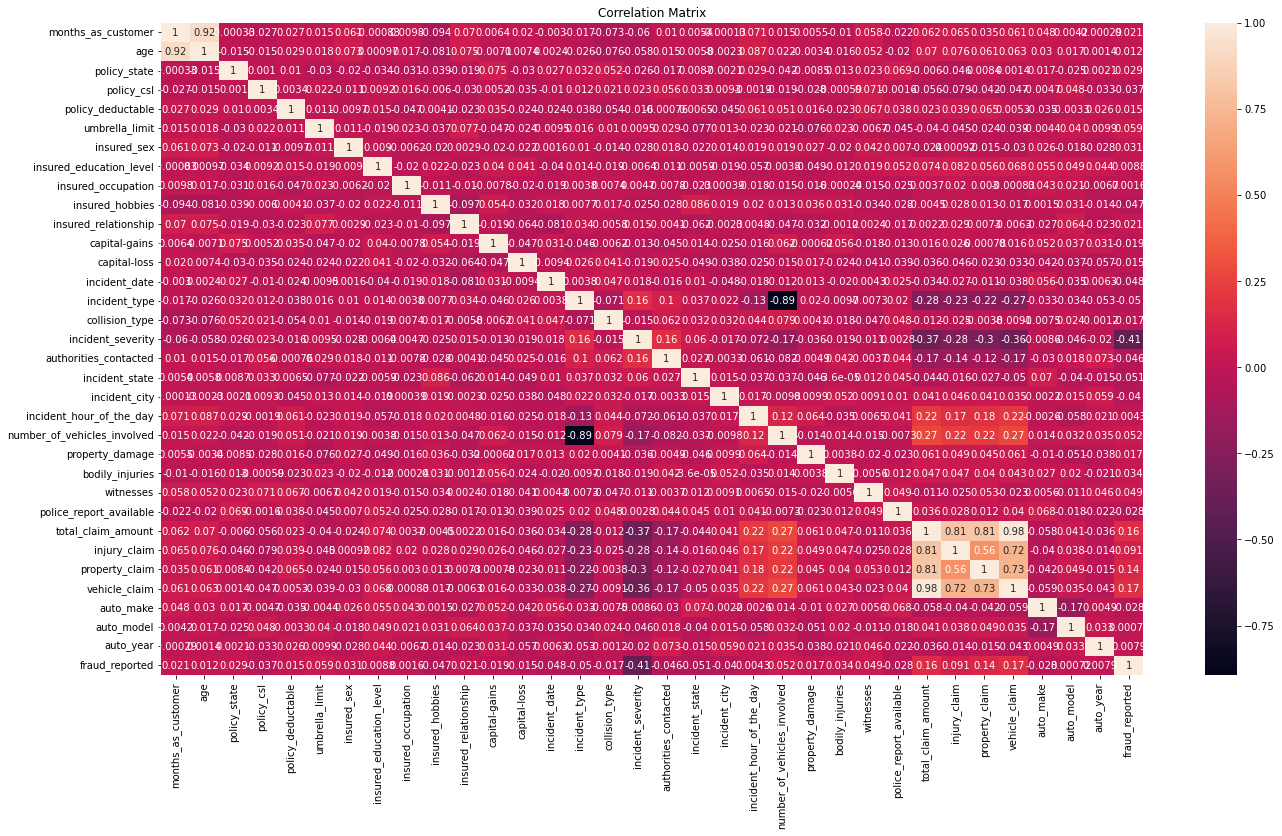

In [72]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

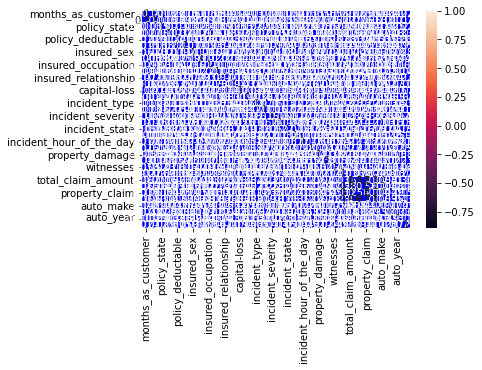

In [74]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='b')

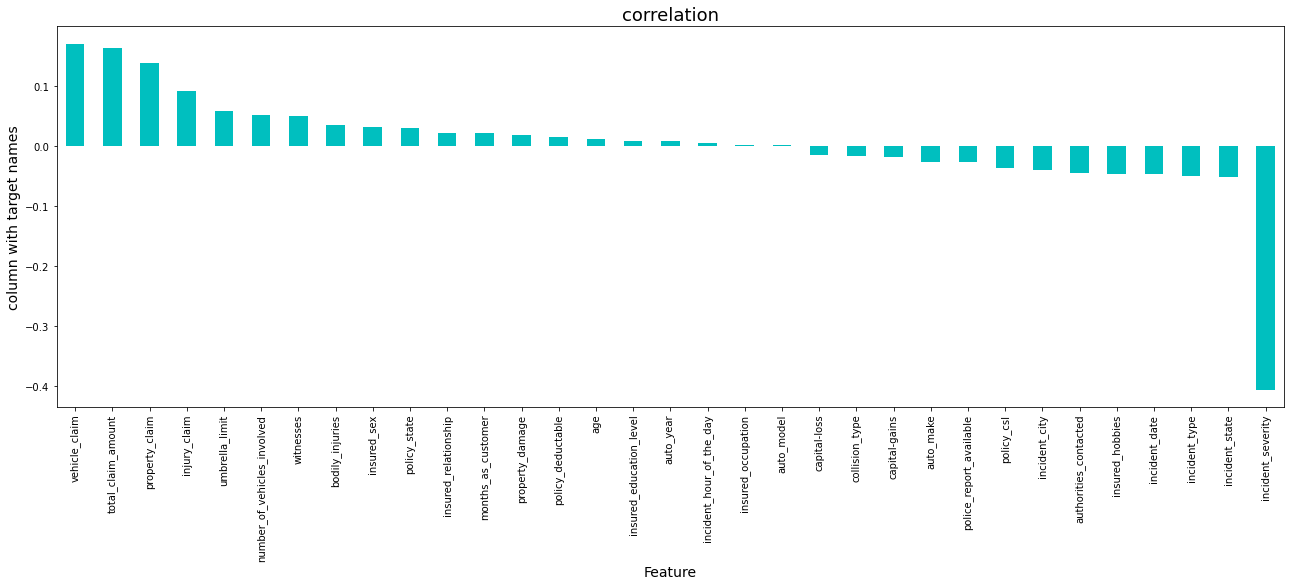

In [75]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [76]:
corr_mat["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.014863
collision_type                -0.017315
capital-gains                 -0.019173
auto_make                     -0.027519


Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.

vehicle_claim, total_claim_amount, property_claim are the positively correlated Column with fraud_reported Column data

incident_severityis the negatively correlated Column with fraud_reported Column data.

auto_model, insured_occupation, incident_hour_of_the_day, auto_year and insured_education_level are the least correlated column data. We can drop these columns if required at later stages for better Model Prediction

# Checking for Outliers through boxplots and analyzing each column Outliers

In [77]:
x = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']
x_outlier=x.copy()
x_outlier

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,0,1,4,2,17,...,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,0,2000,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,0,1,2000,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,0,2,1000,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,0,0,1000,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,2,1,500,3000000,0,5,1,3,...,2,3,1,67500,7500,7500,52500,11,19,1996
998,458,62,0,2,2000,5000000,1,0,5,0,...,0,1,1,46980,5220,5220,36540,1,5,1998


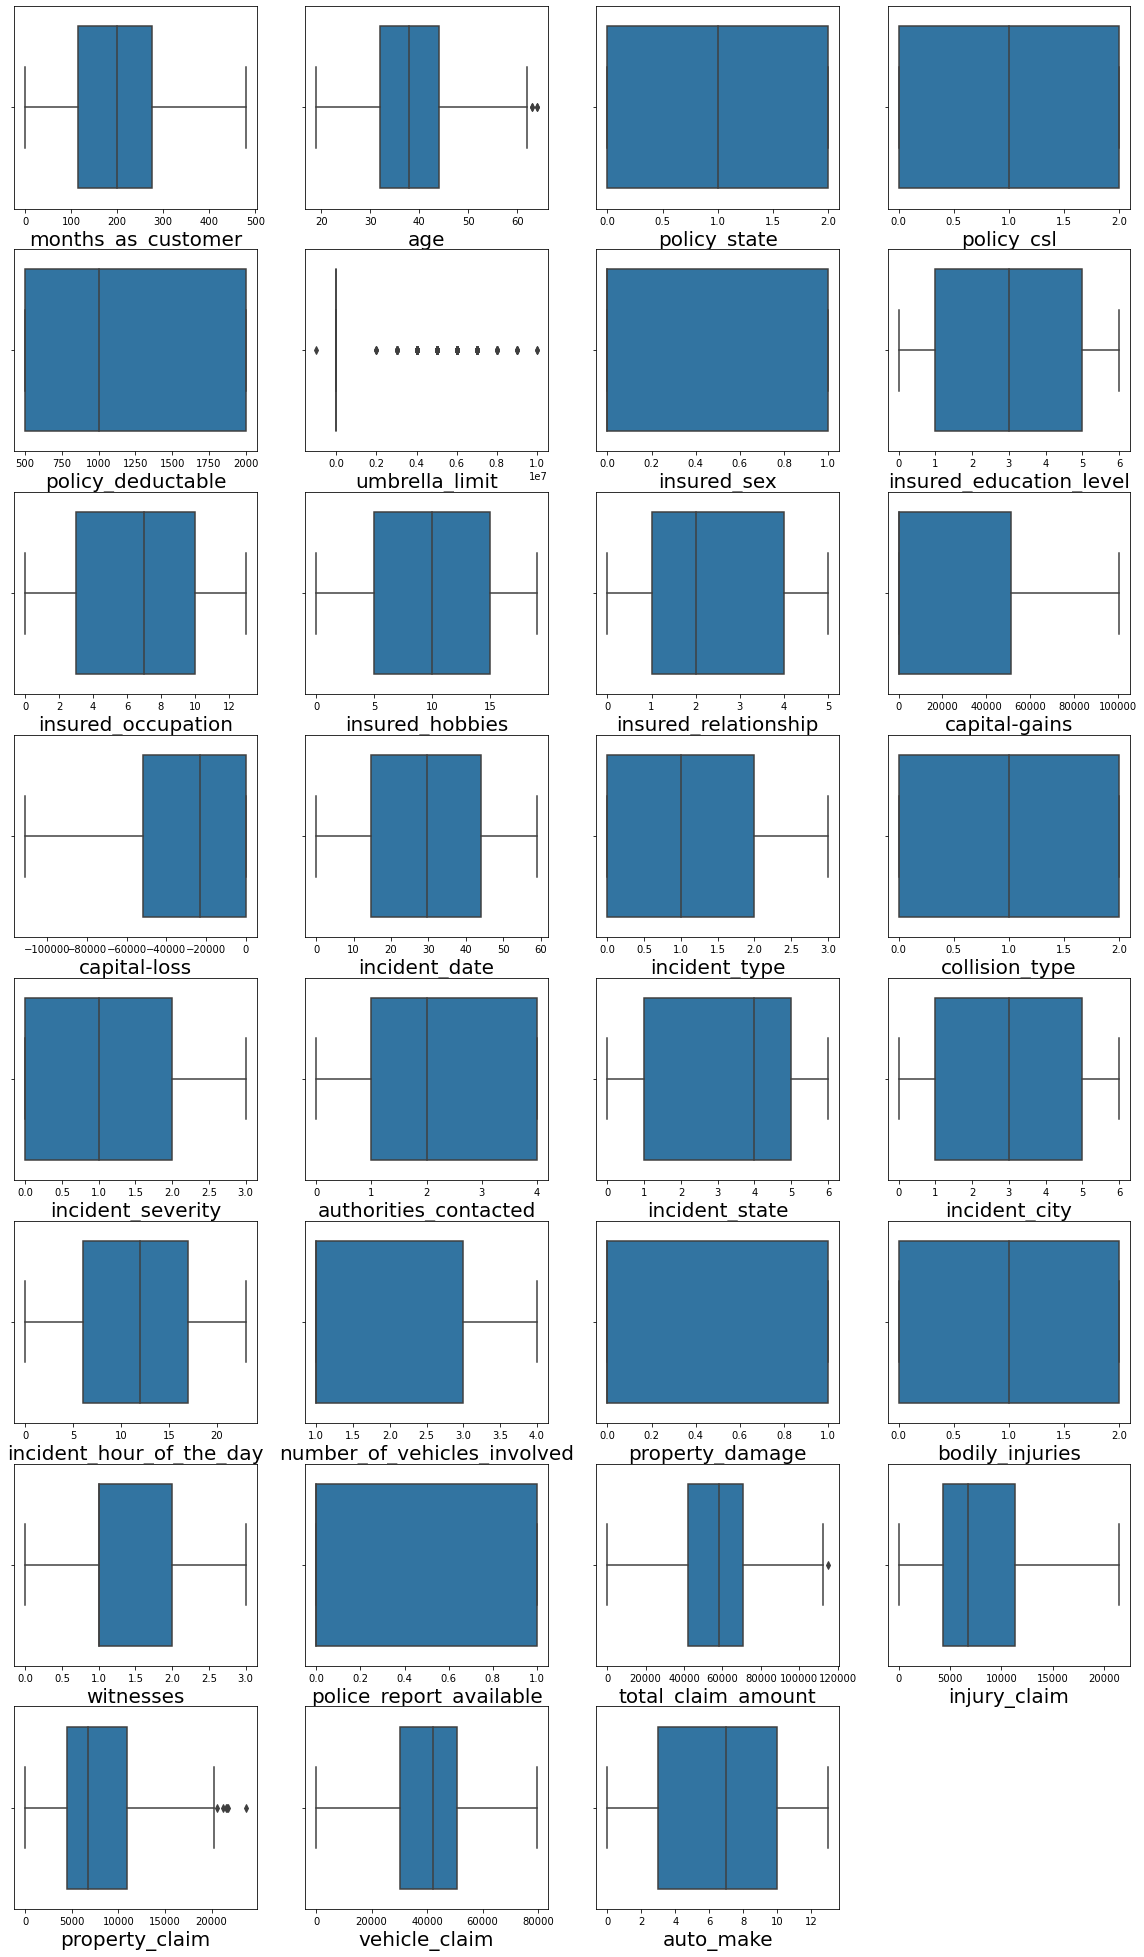

In [78]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

From above plots, we can confirm that there are outliers in umbrella_limit.

We can also observe there is a presence of outliers in age, total_claim_amount, property_claim Column Data which are continous data originally

# Outliers Removal

# Using ZScore Method

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(x_outlier[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]))
x_zscore=x_outlier[(z<3).all(axis=1)]

Obtaining Data Set Shape after Outliers removed using zscore method

In [80]:
x_zscore.shape

(983, 33)

Dataset Shape before Outliers removal

In [81]:
x_outlier.shape

(1000, 33)

In [82]:
zscore_data_loss=((1000-983)/1000)*100
zscore_data_loss

1.7000000000000002

Upon analyzing, found 1.70% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set. which is within acceptable range.

# Analyzing Outliers through Boxplots after using Zscore

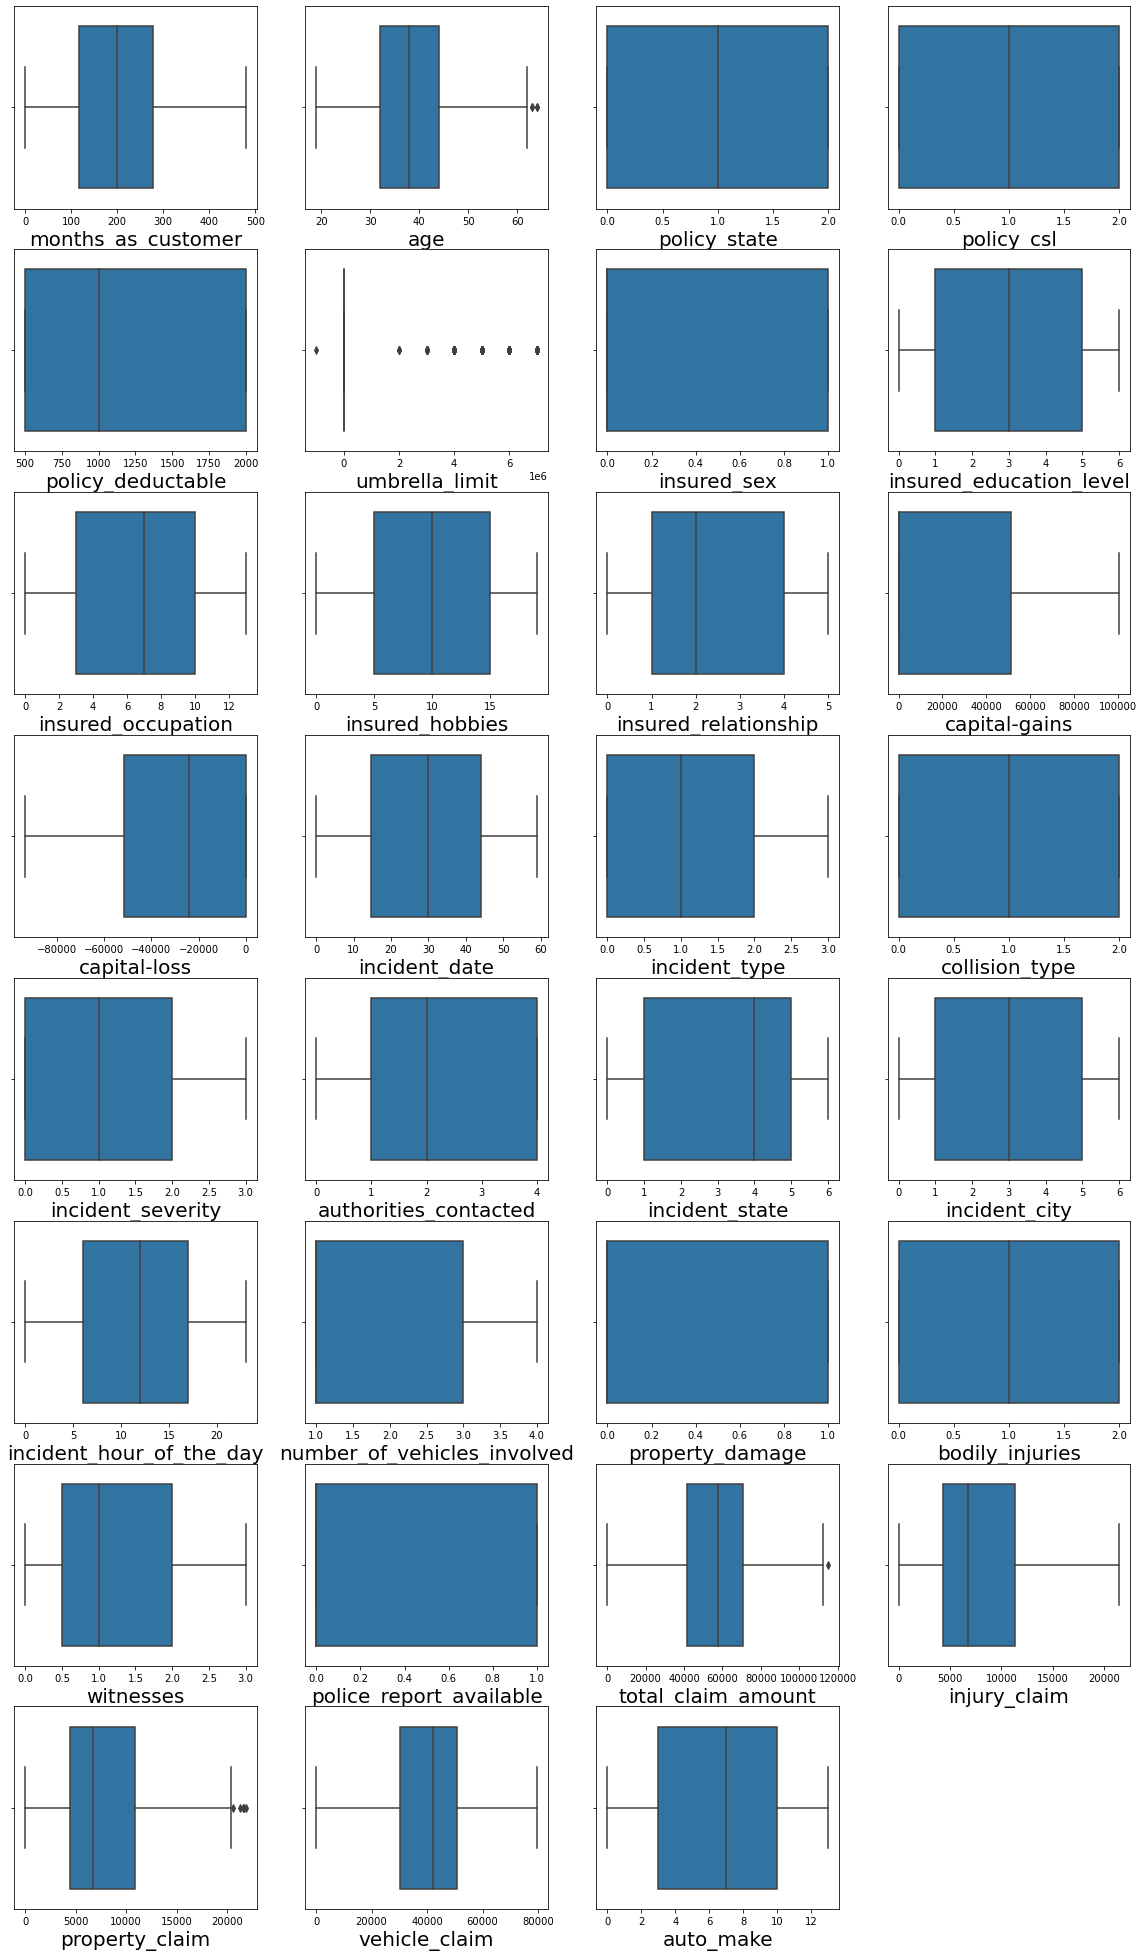

In [83]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers is removed.

# Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [84]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(983, 34)

We can observe that Target variable is merged with outlier removed feature data set

# Skewness Analysis and Skewness Correction

# 1. Using CBRT Technique

In [85]:
df_cbrt = df.copy()
df_cbrt

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,3,38,2,2,1000,0,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
979,285,41,0,0,1000,0,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
980,130,34,2,1,500,3000000,0,5,1,3,...,3,1,67500,7500,7500,52500,11,19,1996,0
981,458,62,0,2,2000,5000000,1,0,5,0,...,1,1,46980,5220,5220,36540,1,5,1998,0


Copying the dataset to new name for CBRT Technique

In [86]:
x = df_cbrt.drop(columns=['fraud_reported'])
y = df_cbrt['fraud_reported']
y.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

In [87]:
x[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']].skew()

months_as_customer             0.366978
age                            0.478560
policy_deductable              0.479334
umbrella_limit                 1.806345
capital-gains                  0.469129
capital-loss                  -0.373733
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.510353
bodily_injuries                0.009371
witnesses                      0.021612
total_claim_amount            -0.594174
injury_claim                   0.268686
property_claim                 0.359799
vehicle_claim                 -0.620758
auto_year                     -0.054521
dtype: float64

Upon review, found umbrella_limit, number_of_vehicles_involved, total_claim_amount, vehicle_claim columns has skewness outside the allowed range of -0.5 to +0.5

In [88]:
x1=x[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]

In [89]:
for index in x1.skew().index:
    if x1.skew().loc[index] >0.50:
        x1[index]=np.cbrt( x1[index])
x1.skew()

months_as_customer             0.366978
age                            0.478560
policy_deductable              0.479334
umbrella_limit                 1.608743
capital-gains                  0.469129
capital-loss                  -0.373733
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.432102
bodily_injuries                0.009371
witnesses                      0.021612
total_claim_amount            -0.594174
injury_claim                   0.268686
property_claim                 0.359799
vehicle_claim                 -0.620758
auto_year                     -0.054521
dtype: float64

Upon reviewing above set after skewness correction from CBRT Technique, found below observations,

numbr_of_vehicles_involved Skewness are reduced and within -0.50 to +0.50 range

umbrella_limit is reduced but it is still outside the range of -0.50 to +0.50

total_claim_amount, vehicle_claim skewness are unchanged

# 2. Using Power Transformer Technique

In [90]:
df_powertransform = df.copy()
df_powertransform

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,3,38,2,2,1000,0,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
979,285,41,0,0,1000,0,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
980,130,34,2,1,500,3000000,0,5,1,3,...,3,1,67500,7500,7500,52500,11,19,1996,0
981,458,62,0,2,2000,5000000,1,0,5,0,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [91]:
x2 = df_powertransform.drop(columns=['fraud_reported'])
y2 = df_powertransform['fraud_reported']
y2.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

In [92]:
x2[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']].skew()

months_as_customer             0.366978
age                            0.478560
policy_deductable              0.479334
umbrella_limit                 1.806345
capital-gains                  0.469129
capital-loss                  -0.373733
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.510353
bodily_injuries                0.009371
witnesses                      0.021612
total_claim_amount            -0.594174
injury_claim                   0.268686
property_claim                 0.359799
vehicle_claim                 -0.620758
auto_year                     -0.054521
dtype: float64

Copying the dataset to new name for Power Transform Technique

In [93]:
x3=x2[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]
x3_skew = power_transform(x3)
x3_skew = pd.DataFrame(x3_skew, columns=x3.columns)
x3_skew.skew()

months_as_customer            -0.132755
age                           -0.001930
policy_deductable              0.022697
umbrella_limit                -7.953468
capital-gains                  0.029301
capital-loss                   0.090459
incident_hour_of_the_day      -0.256701
number_of_vehicles_involved    0.373722
bodily_injuries               -0.131397
witnesses                     -0.153176
total_claim_amount            -0.509845
injury_claim                  -0.416931
property_claim                -0.357866
vehicle_claim                 -0.522728
auto_year                     -0.013979
dtype: float64

Upon reviewing above set after skewness correction from power transform Technique, We can conclude that power transform is best option in reducing the skewness However, umbrella_limit skewness is increased to -7.9 so proceeding with the CBRT Technique

# Analyzing the distribution plots after skewness correction

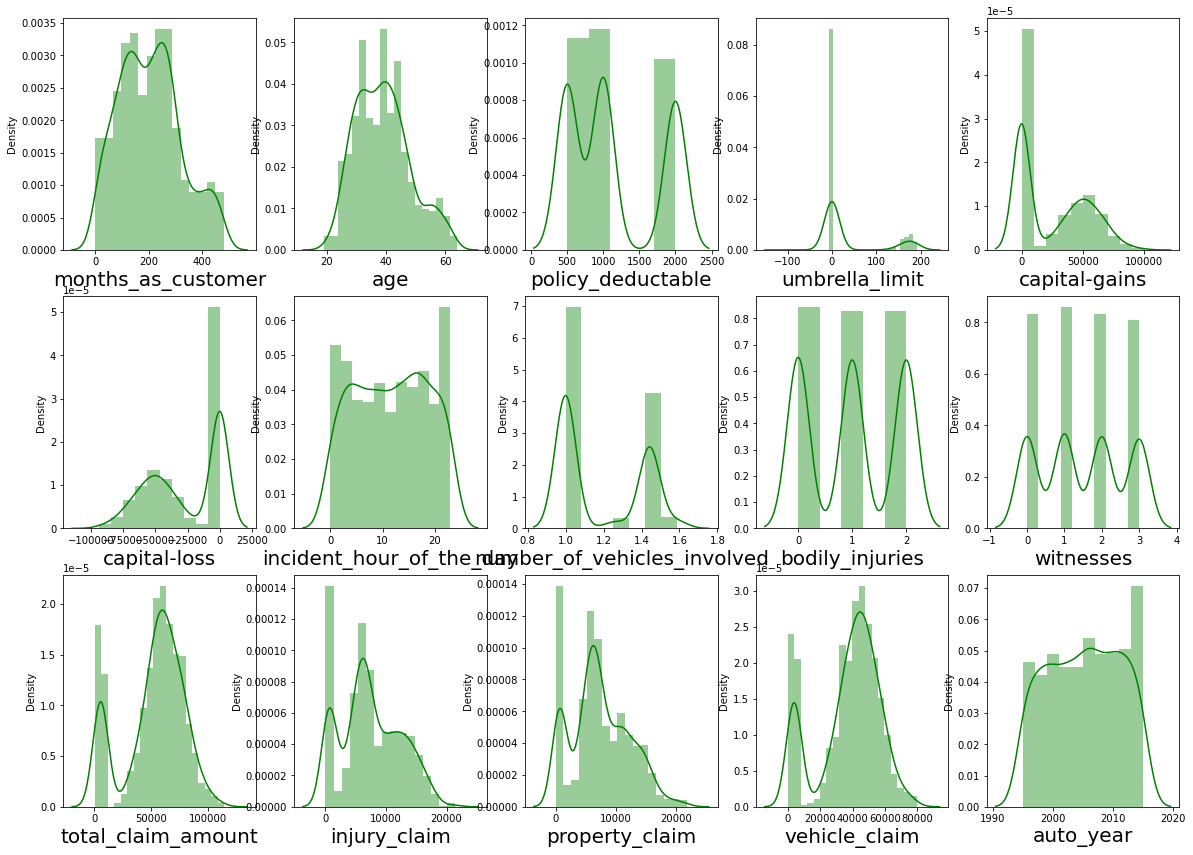

In [94]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x1:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x1[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

# Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

In [95]:
drop_index = df.index.difference(x1.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(983, 34)

# Feature and Target Selection

In [96]:
x = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']
y.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

# Applying Standard Scaler in order to check the Multicollinearity

In [97]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 1.07245795,  0.98604365,  1.18233705, ...,  0.85062198,
        -1.64246755, -0.18996904],
       [ 0.20536729,  0.33230203, -0.02205396, ...,  0.35453097,
        -0.65283189,  0.30888999],
       [-0.60969793, -1.08413814,  1.18233705, ..., -0.63765107,
         0.96657193,  0.30888999],
       ...,
       [-0.64438156, -0.53935346,  1.18233705, ...,  1.09866749,
        -0.02306374, -1.52025979],
       [ 2.19967581,  2.51144076, -1.22644496, ..., -1.38178759,
        -1.28260003, -1.1876871 ],
       [ 2.182334  ,  2.29352689,  1.18233705, ...,  0.35453097,
        -0.65283189,  0.30888999]])

# Obtaining Multicollinearity using Variance Inflation Factor

In [98]:
vif = pd.DataFrame()
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,months_as_customer,6.893254
1,age,6.909648
2,policy_state,1.029209
3,policy_csl,1.025745
4,policy_deductable,1.039449
5,umbrella_limit,1.038163
6,insured_sex,1.021687
7,insured_education_level,1.042712
8,insured_occupation,1.013104
9,insured_hobbies,1.046442


From above set, we can observe that months_as_customer and age column data has high multicollinear.

# Principle Component Analysis

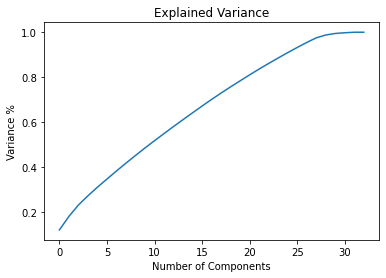

In [99]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 30 Principle components are contributing. So we can retain 30 components out of 33 components and build the model

In [100]:
pca_new = PCA(n_components=30)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(30))
x_principle

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.804978,1.034002,-0.958838,-3.523040,-0.143994,0.100570,0.360912,-1.055969,-0.208118,-1.157545,...,0.062628,0.744225,-0.423472,-1.153865,0.235188,0.725836,0.823095,-0.154615,0.881131,0.115043
1,-3.708454,0.872063,-0.334585,-0.043420,-0.186031,0.023887,0.046074,-0.207342,-0.603499,0.714337,...,1.303766,0.581438,0.482760,0.021470,1.123091,-0.578520,0.136270,0.808587,-0.102903,-0.053258
2,-0.628733,-0.864549,1.594887,1.975541,1.117580,0.255162,0.753179,1.520388,-0.183623,-1.877990,...,0.206316,-0.790410,1.375863,0.267541,-0.193935,-0.810776,-0.436538,1.383537,-0.951107,-0.155328
3,0.093060,1.151008,-1.057038,2.851134,2.340925,-0.410447,1.943577,1.943712,0.187833,-0.321749,...,0.638846,1.368572,-0.767322,-0.188739,-1.014754,0.181475,-0.200259,1.344966,-0.122175,0.836410
4,-3.189580,1.408643,-0.019261,2.783123,-0.092583,0.495779,-0.071842,0.564703,1.836293,-0.308575,...,-0.217195,-0.259724,-2.288965,-0.152193,-1.070947,-0.575725,0.196179,0.702818,-0.104468,-0.363876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1.901606,-1.144540,-2.432230,-0.421020,-1.340296,0.950205,1.016977,0.668373,0.564286,0.087125,...,-0.664688,0.296972,1.499642,-0.466048,1.559898,-0.940808,0.563633,-0.263475,-1.333045,-0.181503
979,4.103715,0.675888,-2.158612,-0.957196,0.734669,-1.897002,-0.096097,0.592412,0.350374,0.422309,...,-0.741480,-1.790156,-0.923216,0.625676,0.752893,-1.347890,-1.083589,0.163564,0.064100,-0.193059
980,0.817166,-1.087419,1.187699,-0.262288,0.640840,0.999876,-0.465018,0.764058,-1.385786,-3.141626,...,-0.591457,0.084254,0.538603,-1.041673,-0.469170,0.966154,-0.693822,0.082122,-0.281310,0.419405
981,-0.739045,3.939455,-0.505321,1.257481,-1.374581,2.120304,0.475901,0.516675,-0.382290,-1.403595,...,1.882098,1.064535,-1.553461,-0.419288,0.625743,0.369267,2.105484,0.301501,-0.066717,0.279513


# Selecting KBest Features

Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [101]:
best_features = SelectKBest(score_func = f_classif, k = 30)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(33,'Scores'))

                       Features      Scores
16            incident_severity  189.911593
29                vehicle_claim   29.501764
26           total_claim_amount   27.318237
28               property_claim   19.945459
27                 injury_claim    8.008395
13                incident_date    3.299903
18               incident_state    2.628940
24                    witnesses    2.363778
9               insured_hobbies    2.143836
21  number_of_vehicles_involved    2.115560
17        authorities_contacted    2.003445
5                umbrella_limit    1.932134
14                incident_type    1.823302
19                incident_city    1.656928
23              bodily_injuries    1.437923
2                  policy_state    1.262364
3                    policy_csl    0.892911
10         insured_relationship    0.855660
30                    auto_make    0.795880
22              property_damage    0.634131
25      police_report_available    0.407118
0            months_as_customer 

Upon reviewing Best Features Scores, found auto_model, insured_occupation, incident_hour_of_the_day has the least scores and also these have the less correlationship. However, after analyzing the model accuracy with these dropped column, it was observed that similar accuaracy was obtained so proceeding with this column

In [102]:
x_best = x.copy()
x_best

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,0,1,4,2,17,...,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,0,2000,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,0,1,2000,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,0,2,1000,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,3,38,2,2,1000,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,2006
979,285,41,0,0,1000,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,2015
980,130,34,2,1,500,3000000,0,5,1,3,...,2,3,1,67500,7500,7500,52500,11,19,1996
981,458,62,0,2,2000,5000000,1,0,5,0,...,0,1,1,46980,5220,5220,36540,1,5,1998


# Model Building: Classification Problem

# Finding the Best Random State

In [106]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8131147540983606 on random_state: 32


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [108]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

In [109]:
#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

In [110]:
#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

In [111]:
#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

In [112]:
#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

# Random Forest Classifier

In [113]:
confusion_matrix_rfc

array([[214,  33],
       [ 33,  25]], dtype=int64)

In [114]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.43      0.43      0.43        58

    accuracy                           0.78       305
   macro avg       0.65      0.65      0.65       305
weighted avg       0.78      0.78      0.78       305



In [115]:
print(cvs_rfc)

0.7670672329845644


In [116]:
print(roc_rfc)

0.6487156219461119


rfc_difference = 90-85.78 = 4.22

# Logistic Regression Model

In [117]:
confusion_matrix_lrc

array([[247,   0],
       [ 58,   0]], dtype=int64)

In [118]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       247
           1       0.00      0.00      0.00        58

    accuracy                           0.81       305
   macro avg       0.40      0.50      0.45       305
weighted avg       0.66      0.81      0.72       305



In [119]:
print(cvs_lrc)

0.7528022376463275


In [120]:
print(roc_lrc)

0.5


# Decision Tree Classifier Model

In [121]:
confusion_matrix_dtc

array([[204,  43],
       [ 27,  31]], dtype=int64)

In [122]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       247
           1       0.42      0.53      0.47        58

    accuracy                           0.77       305
   macro avg       0.65      0.68      0.66       305
weighted avg       0.79      0.77      0.78       305



In [123]:
print(cvs_dtc)

0.7823267378017196


In [124]:
print(roc_dtc)

0.6801968448973893


dtc_difference = 87-80.66 = 6.34

# SVC Model

In [125]:
confusion_matrix_sv

array([[247,   0],
       [ 58,   0]], dtype=int64)

In [126]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       247
           1       0.00      0.00      0.00        58

    accuracy                           0.81       305
   macro avg       0.40      0.50      0.45       305
weighted avg       0.66      0.81      0.72       305



In [127]:
print(cvs_sv)

0.7548326944991194


In [128]:
print(roc_sv)

0.5


sv_difference = 86-82.35 = 3.65

# K Nearest Neighbors Classifier Model

In [129]:
confusion_matrix_knn

array([[222,  25],
       [ 48,  10]], dtype=int64)

In [130]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       247
           1       0.29      0.17      0.22        58

    accuracy                           0.76       305
   macro avg       0.55      0.54      0.54       305
weighted avg       0.72      0.76      0.74       305



In [131]:
print(cvs_knn)

0.7039883973894127


In [132]:
print(roc_knn)

0.5355996091023315


knn_difference = 73-70.35 = 2.65

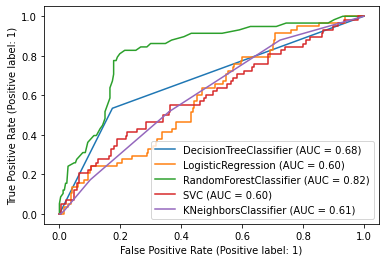

In [133]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, KNN Classifier Model ranks with least difference followed by SVC and Random Forest Classifier. However, Random Forest Classifier has best AUC score compared to SVC and also accuarcy is high so choosing Random Forest Classifier as Best Model and proceeding with Hyper Paramater tuning

# Hyper Parameter Tuning Using Grid Search

# Defining the Parameters list for Random Forest Classifier

In [134]:
parameters = {'ccp_alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,200,150],
             'max_features': ["auto","sqrt","log2"]}

In [135]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [136]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 200, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [137]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 200,
 'max_features': 'sqrt'}

Obtaining Best Parameters details for Best Model after training the parameters list given

# Training the Best Model with the Best Model Parameters

In [138]:
Best_model = RandomForestClassifier(ccp_alpha = 0.005, bootstrap = False, criterion = 'entropy', max_depth = 200, max_features = 'log2')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

79.67213114754098


# Saving the Best Model

In [140]:
joblib.dump(Best_model,"Insurance_Claim_Fraud_Detection_Project_Final_Best_Model_Random_Forest_Classifier.pkl")

['Insurance_Claim_Fraud_Detection_Project_Final_Best_Model_Random_Forest_Classifier.pkl']

# Loading the Best Model

In [141]:
joblib.dump(Best_model,"Insurance_Claim_Fraud_Detection_Project_Final_Best_Model_Random_Forest_Classifier.pkl")

['Insurance_Claim_Fraud_Detection_Project_Final_Best_Model_Random_Forest_Classifier.pkl']

# Comparing Actual Value and Predicted Value

In [142]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
300,1,1
301,1,0
302,1,0
303,1,1


Upon review, found Predicted Value is 90.45% equivalent to Actual Values